# MISSING DATA EXPLO FOR WEATHER DATASET (HOURLY)

### Load Weather Data

In [36]:
import pandas as pd

In [37]:
input_weather_dir = "../data/intermediate/parquet/weather/hourly/"
df_weather = pd.read_parquet(input_weather_dir + "01014002_ARBENT.parquet")
df_weather.head()

,td,ta,ta_max,ta_min,rh,rh_max,rh_min,wd,ws,dxi,...,snow_height,nebulosity,insolh_duration,glo,pres,pres_sl,station_name,lon,lat,alt
time,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,273.750000,273.750000,273.750000,273.549988,100.0,100.0,100.0,0.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,b'ARBENT',5.669,46.278198,534.0
2005-01-01 01:00:00,273.549988,273.649994,273.750000,273.649994,100.0,100.0,100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,b'ARBENT',5.669,46.278198,534.0
2005-01-01 02:00:00,273.750000,273.850006,273.950012,273.549988,100.0,100.0,100.0,0.0,0.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,b'ARBENT',5.669,46.278198,534.0
2005-01-01 03:00:00,273.750000,273.750000,273.950012,273.750000,100.0,100.0,100.0,0.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,b'ARBENT',5.669,46.278198,534.0
2005-01-01 04:00:00,274.049988,274.049988,274.250000,273.750000,100.0,100.0,100.0,60.0,0.6,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,b'ARBENT',5.669,46.278198,534.0


### Compute Missing Values Percentage for Wind Speed

In [38]:
def check_missing_data(df):
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    return missing_df

check_missing_data(df_weather)

,Missing Values,Percentage
td,803,0.459774
ta,242,0.138562
ta_max,291,0.166618
ta_min,266,0.152304
rh,801,0.458629
rh_max,1293,0.740334
rh_min,1296,0.742051
wd,1199,0.686512
ws,789,0.451758
dxi,1260,0.721439


In [39]:
def check_missing_ws_values(df):
    df = df[['ws']]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    return missing_df

check_missing_ws_values(df_weather)

,Missing Values,Percentage
ws,789,0.451758


In [40]:
from tqdm import tqdm
from pathlib import Path

missing_ws_stats_list = []

weather_files = list(Path(input_weather_dir).glob("*.parquet"))
        
iterator = tqdm(weather_files, desc="Computing returns for all stations")
for energy_file in iterator:
    station_id = energy_file.stem
    df_weather = pd.read_parquet(energy_file)

    missing_ws_df = check_missing_ws_values(df_weather)
    missing_ws_values = missing_ws_df.loc['ws', 'Missing Values']
    missing_ws_percentage = missing_ws_df.loc['ws', 'Percentage']

    missing_ws_stats_list.append({
        'station_id': station_id,
        'missing_ws_values': missing_ws_values,
        'missing_ws_percentage': missing_ws_percentage
    })

# Create DataFrame once after the loop
missing_ws_stats_df = pd.DataFrame(missing_ws_stats_list)
missing_ws_stats_df.head()

Computing returns for all stations: 100%|██████████| 1160/1160 [00:08<00:00, 141.62it/s]


,station_id,missing_ws_values,missing_ws_percentage
0,53096004_ERNEE,24,0.013689
1,01014002_ARBENT,789,0.451758
2,24138004_COULOUNIEIX,2257,1.302351
3,13111002_VAUVENARGUES,822,0.469497
4,26327001_ST-ROMAN-DIOIS,658,0.376236


### Plot histogram of missing wind speed values percentage

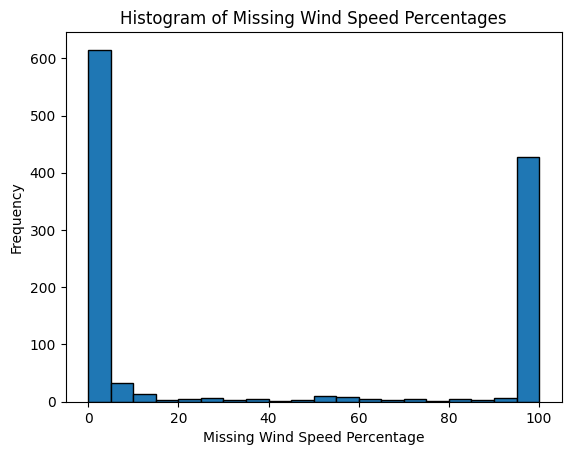

In [41]:
import matplotlib.pyplot as plt

plt.hist(missing_ws_stats_df['missing_ws_percentage'], bins=20, edgecolor='black')
plt.xlabel('Missing Wind Speed Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Wind Speed Percentages')
plt.show()

### Plot Missing Values on France Map

In [42]:
meta_list = []
for f in weather_files:
    station_id = f.stem
    try:
        meta = pd.read_parquet(f, columns=['lon', 'lat']).iloc[0]
        meta_list.append({'station_id': station_id, 'lon': float(meta['lon']), 'lat': float(meta['lat'])})
    except Exception:
        meta_list.append({'station_id': station_id, 'lon': None, 'lat': None})
        print(f"Could not read metadata for station {station_id}")

meta_df = pd.DataFrame(meta_list)

missing_ws_with_loc = missing_ws_stats_df.merge(meta_df, on='station_id', how='left')
missing_ws_with_loc = missing_ws_with_loc.sort_values('missing_ws_percentage', ascending=False)

# show top stations with highest missing percentages
missing_ws_with_loc.head(20)

,station_id,missing_ws_values,missing_ws_percentage,lon,lat
1159,69135001_MONSOLS,33712,100.0,4.523200,46.219200
664,87159002_ST-LEGER-LA-MONTAGNE_SAPC,175282,100.0,1.459700,46.035301
730,73220001_ST-ALBAN-DES-HURTIERES,107371,100.0,6.271300,45.477200
315,18087001_DUN,57895,100.0,2.566200,46.878300
314,48198001_VILLEFORT,166585,100.0,3.928300,44.441700
312,07064001_CHEYLARD_SA,175118,100.0,4.437500,44.914799
735,25047001_BAUME-LES-DAMES,56187,100.0,6.350300,47.347198
737,15118002_MARMANHAC,42693,100.0,2.474500,45.002800
740,97401540_LES-AVIRONS-CIRAD,162128,100.0,55.327499,-21.239500
741,66157001_RAILLEU,24103,100.0,2.181000,42.586700


#### Using Geopandas

In [43]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(missing_ws_with_loc['lon'], missing_ws_with_loc['lat'])]
gdf = gpd.GeoDataFrame(missing_ws_with_loc, geometry=geometry, crs='EPSG:4326')

gdf.explore(
    column='missing_ws_percentage',  # color by this column
    cmap='RdYlGn_r',  # red-yellow-green reversed (red=high)
    tooltip=['station_id', 'missing_ws_percentage'],  # show on hover
    popup=True,  # show all values on click
    tiles='CartoDB positron',  # background map style
    marker_kwds=dict(radius=5, fill=True),
    legend=True,
    legend_kwds=dict(caption='Missing WS Values (%)'),
    location=[46.5, 2.5],
    zoom_start=6
)


#### Using Plotly

In [44]:
import plotly.express as px

fig = px.scatter_map(
    missing_ws_with_loc,
    lat='lat',
    lon='lon',
    color='missing_ws_percentage',
    hover_name='station_id',
    hover_data={
        'station_id': True,
        'missing_ws_percentage': ':.2f',
        'lat': False,
        'lon': False
    },
    color_continuous_scale='RdYlGn_r',  # red-yellow-green reversed (red=high missing)
    zoom=4.63,
    center={'lat': 46.5, 'lon': 2.5},  # center of France
    title='Wind Speed Missing Values by Station'
)

fig.update_layout(
    mapbox_style='open-street-map',
    height=700,
    width=900,
    coloraxis_colorbar=dict(
        title='Missing %',
        ticksuffix='%'
    )
)

fig.show()


#### Using Folium (html file to be visualized on browser)

In [45]:
import folium
from branca.colormap import LinearColormap

m = folium.Map(location=[46.5, 2.5], zoom_start=6)

colormap = LinearColormap(
    colors=['green', 'yellow', 'red'],
    vmin=missing_ws_with_loc['missing_ws_percentage'].min(),
    vmax=missing_ws_with_loc['missing_ws_percentage'].max(),
    caption='Missing Values (%)'
)

for idx, row in missing_ws_with_loc.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=f"Station: {row['station_id']}<br>Missing: {row['missing_ws_percentage']:.2f}%",
        tooltip=f"{row['station_id']}: {row['missing_ws_percentage']:.2f}%",
        color=colormap(row['missing_ws_percentage']),
        fill=True,
        fillColor=colormap(row['missing_ws_percentage']),
        fillOpacity=0.7
    ).add_to(m)

colormap.add_to(m)

m.save('../reports/figures/france_stations_map.html')
